In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pickle

In [2]:
top_protein_path = "../data/top_protein_to_peptide.pkl"

with open(top_protein_path, "rb") as f:
    top_protein_to_peptide = pickle.load(f)
top_protein_to_peptide

defaultdict(list,
            {'sp|P02768|ALBU_HUMAN': [70252,
              70224,
              70246,
              72191,
              57364,
              58283,
              60073,
              60816,
              67338,
              69789,
              73517,
              57100,
              63818,
              54896],
             'sp|P00738|HPT_HUMAN': [42797, 43385],
             'sp|P01871|IGHM_HUMAN': [10133, 9615],
             nan: [6744],
             'tr|A0A087WWT3|A0A087WWT3_HUMAN': [81336, 81378],
             'sp|P01833|PIGR_HUMAN': [46200],
             'sp|P01024|CO3_HUMAN': [89047],
             'sp|P02647|APOA1_HUMAN': [96756],
             'sp|P0DOY2|IGLC2_HUMAN': [53501],
             'sp|P01857|IGHG1_HUMAN': [40058]})

In [3]:
top_protein_to_peptide_idx = dict()
for key, value in top_protein_to_peptide.items():
    top_protein_to_peptide_idx[key] = [x - 1 for x in value]
top_protein_to_peptide_idx

{'sp|P02768|ALBU_HUMAN': [70251,
  70223,
  70245,
  72190,
  57363,
  58282,
  60072,
  60815,
  67337,
  69788,
  73516,
  57099,
  63817,
  54895],
 'sp|P00738|HPT_HUMAN': [42796, 43384],
 'sp|P01871|IGHM_HUMAN': [10132, 9614],
 nan: [6743],
 'tr|A0A087WWT3|A0A087WWT3_HUMAN': [81335, 81377],
 'sp|P01833|PIGR_HUMAN': [46199],
 'sp|P01024|CO3_HUMAN': [89046],
 'sp|P02647|APOA1_HUMAN': [96755],
 'sp|P0DOY2|IGLC2_HUMAN': [53500],
 'sp|P01857|IGHG1_HUMAN': [40057]}

In [4]:
prot = pd.read_csv("../../feature_selection/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv",sep='\t')

/tmp/ipykernel_29091/514751148.py:1: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  prot = pd.read_csv("../../feature_selection/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv",sep='\t')


In [5]:
# top_protein_to_peptide_idx = dict()
# for protein in top_protein_to_peptide:
#     top_protein_to_peptide_idx[protein] = list(prot.index[prot["Top_protein"] == protein])
# top_protein_to_peptide_idx

In [6]:
len(top_protein_to_peptide_idx["sp|P02768|ALBU_HUMAN"])

14

In [7]:
prot.head()

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04


In [8]:
df = pd.read_pickle("../../feature_selection/covid19_sera_merged.pkl")
df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,is_train,Patient ID a,Metabolomics ID e,Metabolites,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,0,0,1,HC1,jkdz1,jkdz1,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,0,0,0,HC10,jkdz10,jkdz10,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,0,0,0,HC12,jkdz12,jkdz12,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,0,0,1,HC13,jkdz13,jkdz13,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,0,0,1,HC17,jkdz17,jkdz17,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [9]:
variants = df.iloc[:, 102412:203873]
variants = variants.replace(0, np.nan)
mean = np.nanmean(variants.replace(0, np.nan), axis=0)
std = np.nanstd(variants.replace(0, np.nan), axis=0)
variants = (variants.copy() - mean) / std
variants[variants < -3] = -3
variants[variants > 3] = 3
variants

/tmp/ipykernel_29091/1030184473.py:3: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(variants.replace(0, np.nan), axis=0)
/home/pisit/devel/miniconda3/envs/ml-env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,variant_ccms_row_1,variant_ccms_row_2,variant_ccms_row_3,variant_ccms_row_4,variant_ccms_row_5,variant_ccms_row_6,variant_ccms_row_7,variant_ccms_row_8,variant_ccms_row_9,variant_ccms_row_10,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,NaN,NaN,1.609297,NaN,NaN,NaN,NaN,NaN,NaN,0.047894,...,NaN,2.777755,NaN,NaN,2.018722,NaN,NaN,NaN,-0.349012,NaN
1,2.682474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.278688,...,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.462823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.299804,...,NaN,0.701703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.541583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.275717,...,NaN,0.944425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.241727,2.339852,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.891249,0.924065,0.301845,NaN,NaN,NaN,NaN,0.332104,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554495,-0.354284,-0.266041,...,NaN,-0.927236,NaN,NaN,NaN,NaN,NaN,-0.810691,NaN,-0.746113
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.509312,-0.361704,-0.285181,...,NaN,-0.734616,NaN,NaN,NaN,NaN,NaN,-0.939779,NaN,-0.905600
80,NaN,-0.858667,-0.487712,NaN,NaN,NaN,NaN,NaN,NaN,-0.234297,...,NaN,-0.620934,-0.602980,NaN,NaN,-0.742916,-0.834701,NaN,NaN,NaN
81,NaN,0.385410,-0.572525,NaN,NaN,NaN,NaN,NaN,NaN,-0.218005,...,NaN,-0.621285,-0.915411,NaN,NaN,1.032143,-0.268613,NaN,NaN,NaN


Result for sp|P02768|ALBU_HUMAN


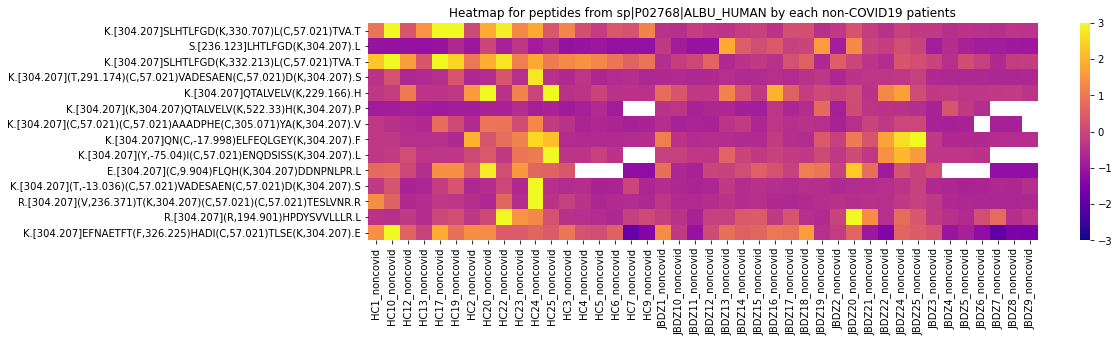

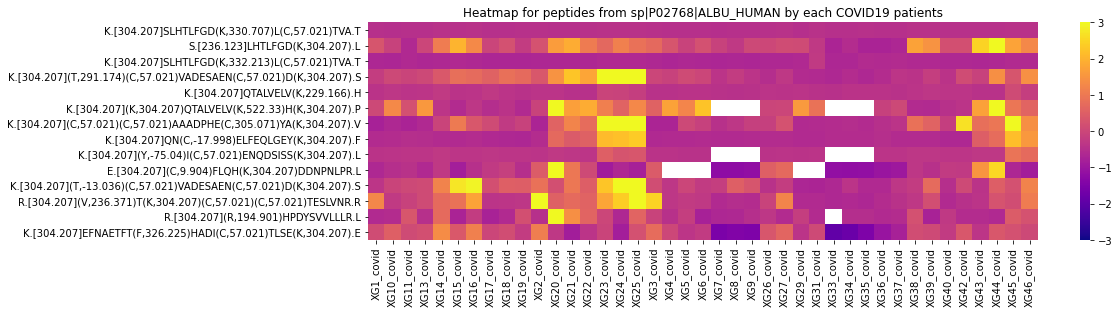

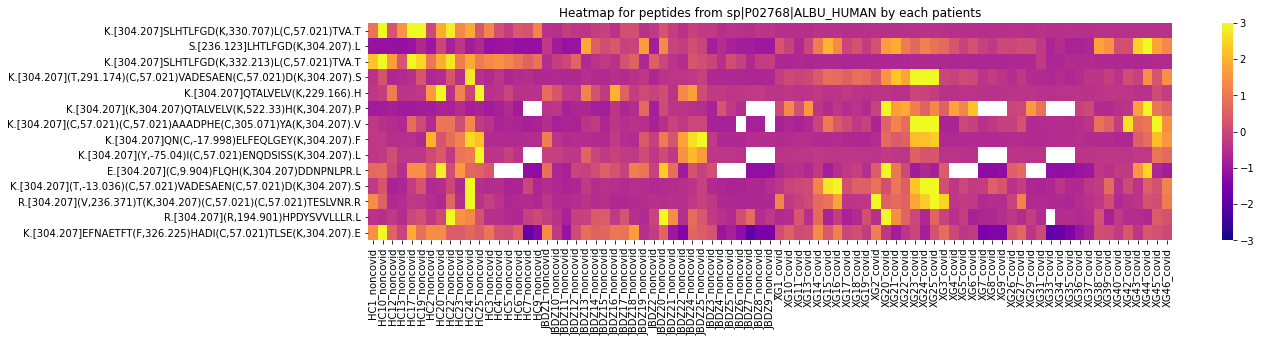

Result for sp|P00738|HPT_HUMAN


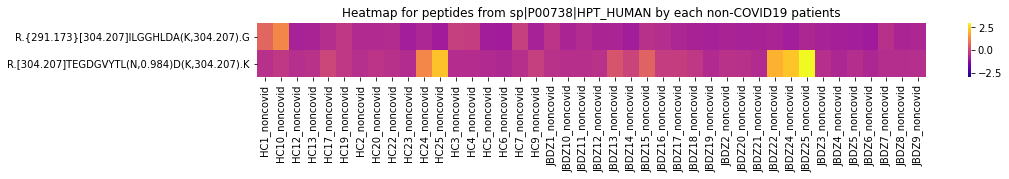

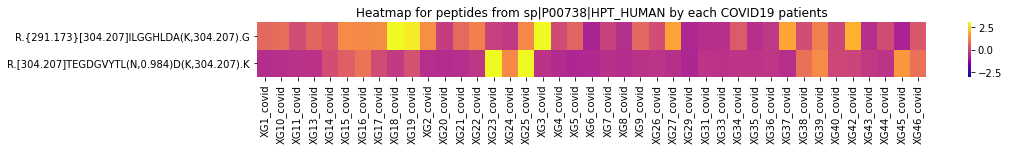

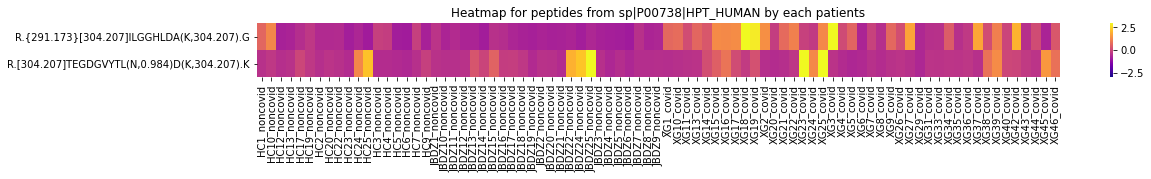

Result for sp|P01871|IGHM_HUMAN


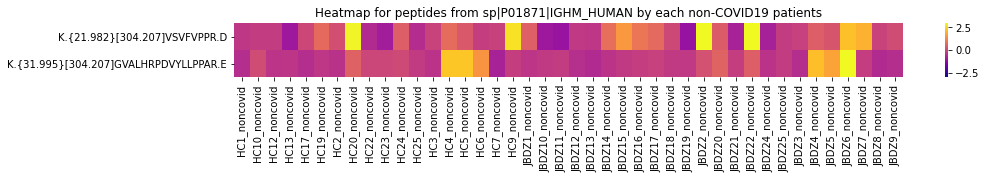

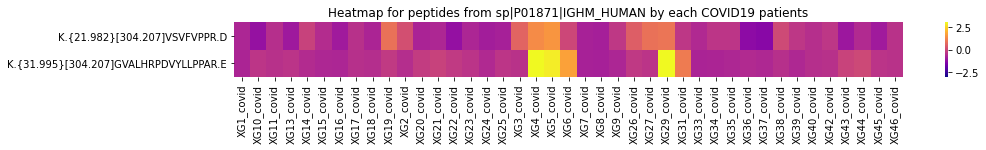

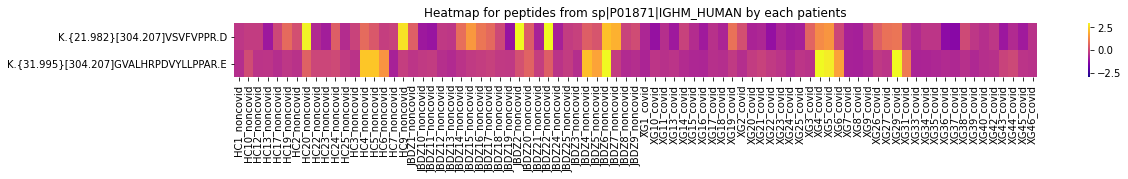

Result for nan


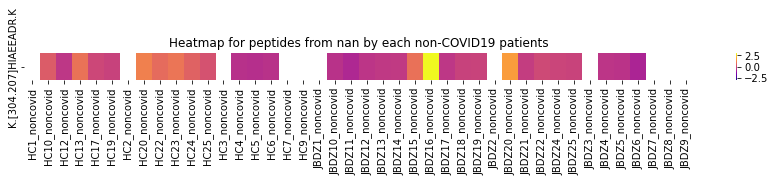

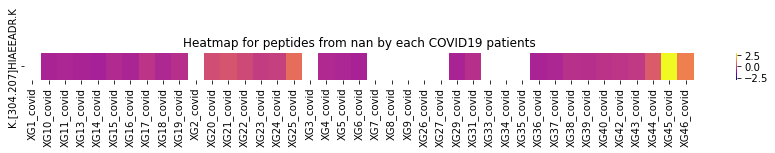

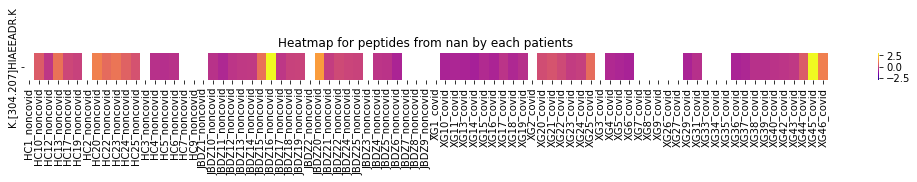

Result for tr|A0A087WWT3|A0A087WWT3_HUMAN


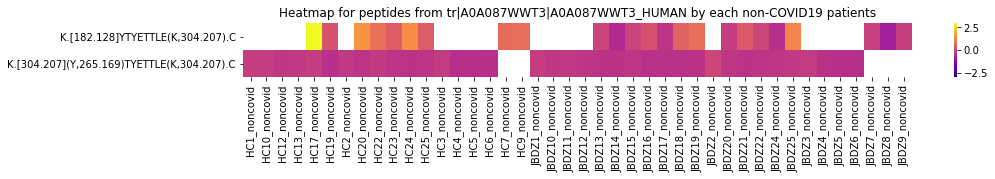

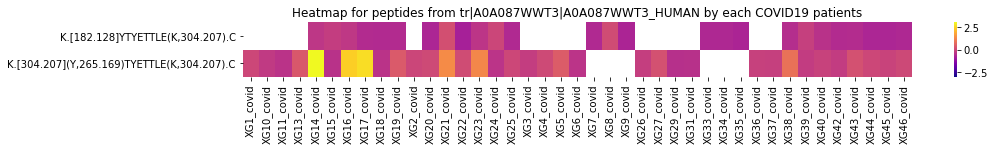

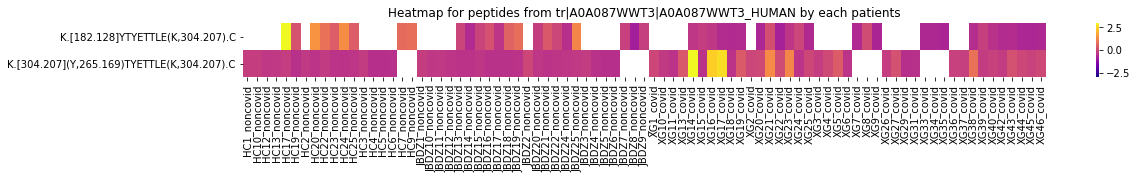

Result for sp|P01833|PIGR_HUMAN


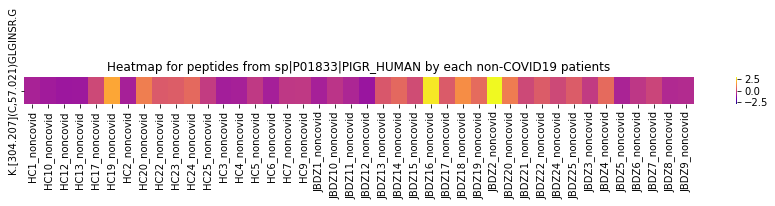

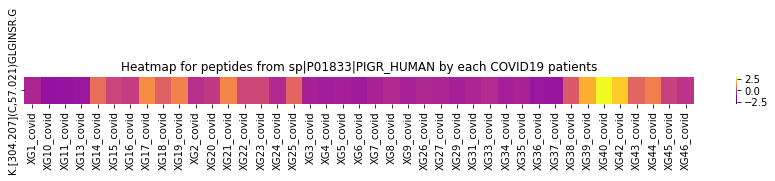

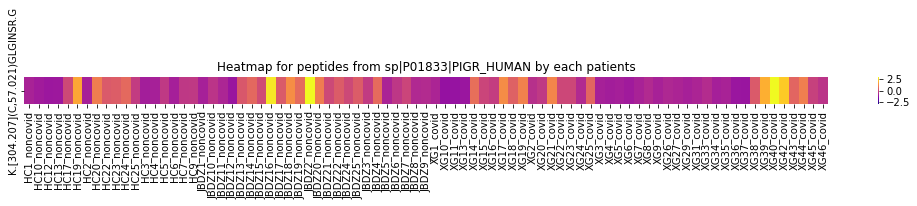

Result for sp|P01024|CO3_HUMAN


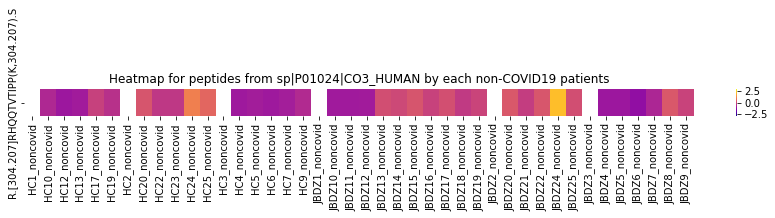

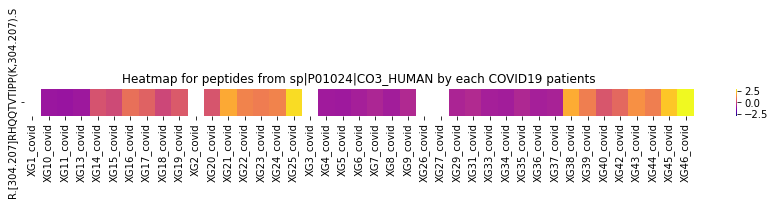

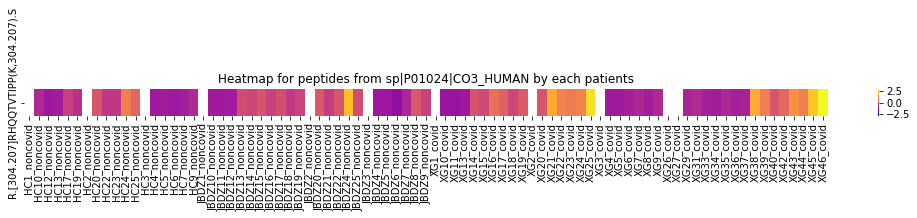

Result for sp|P02647|APOA1_HUMAN


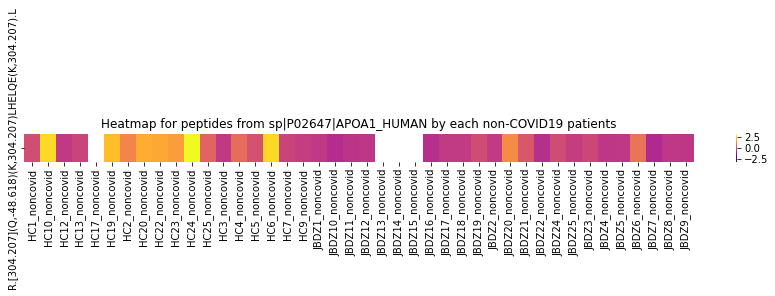

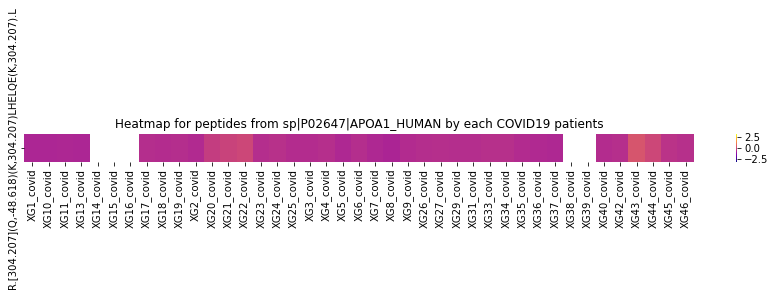

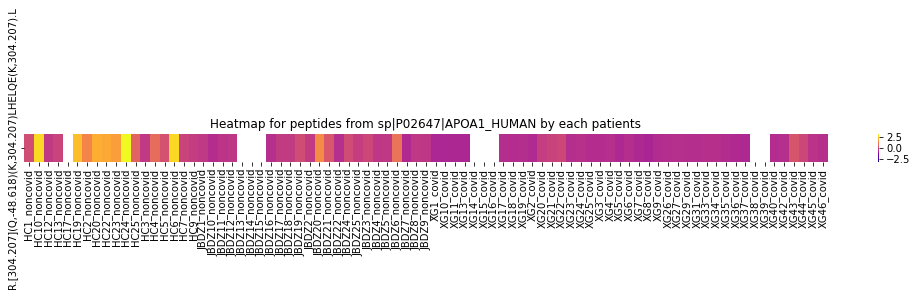

Result for sp|P0DOY2|IGLC2_HUMAN


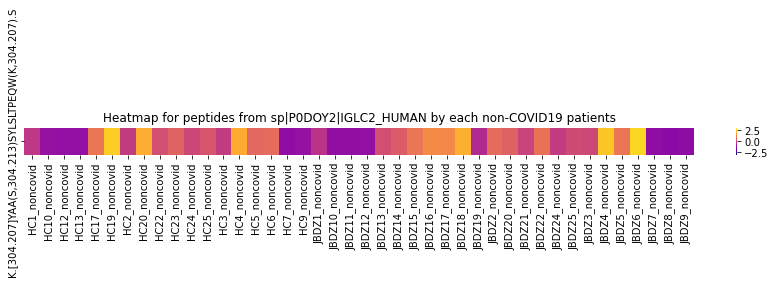

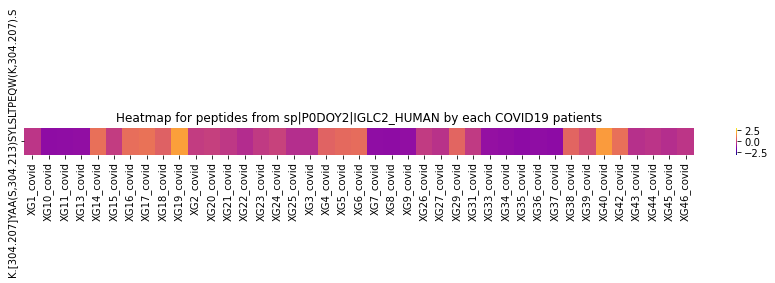

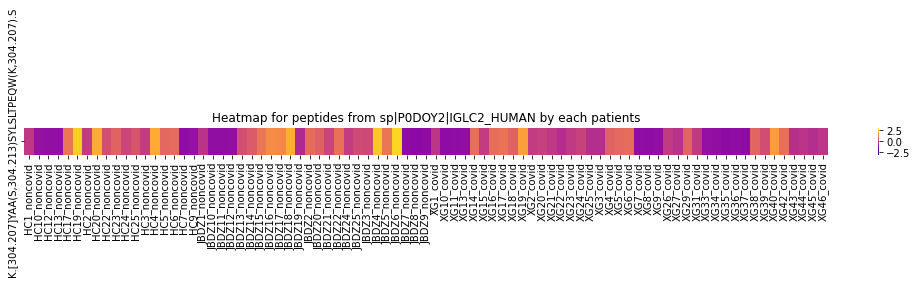

Result for sp|P01857|IGHG1_HUMAN


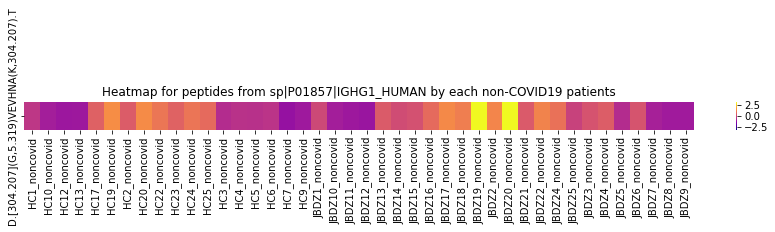

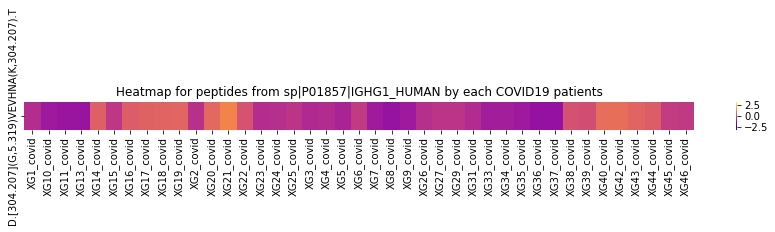

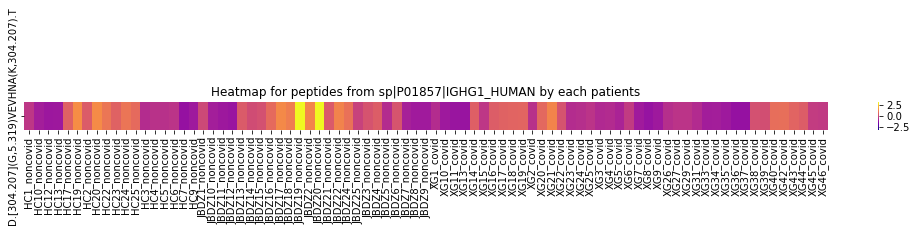

In [10]:
for protein, peptide_idxs in top_protein_to_peptide_idx.items():
    print("Result for", protein)

    if len(peptide_idxs) == 1:
        row_size = 0.5
    elif len(peptide_idxs) == 2:
        row_size = 1
    else:
        row_size = 4

    non_covid = variants.loc[df["y_covid"] == 0, :].iloc[:, peptide_idxs].to_numpy().T
    covid = variants.loc[df["y_covid"] == 1, :].iloc[:, peptide_idxs].to_numpy().T
    non_covid_patients = df.loc[df["y_covid"] == 0, "patient_id"] + "_noncovid"
    covid_patients = df.loc[df["y_covid"] == 1, "patient_id"] + "_covid"
    seqs = prot.iloc[peptide_idxs]["Peptide"]

    plt.figure(figsize=(15, row_size))
    plt.title(f"Heatmap for peptides from {protein} by each non-COVID19 patients")
    ax = sns.heatmap(non_covid, yticklabels=seqs, xticklabels=non_covid_patients, cmap="plasma", vmin=-3, vmax=3)
    plt.show()

    plt.figure(figsize=(15, row_size))
    plt.title(f"Heatmap for peptides from {protein} by each COVID19 patients")
    ax = sns.heatmap(covid, yticklabels=seqs, xticklabels=covid_patients, cmap="plasma", vmin=-3, vmax=3)
    plt.show()

    plt.figure(figsize=(18, row_size))
    plt.title(f"Heatmap for peptides from {protein} by each patients")
    ax = sns.heatmap(np.concatenate([non_covid, covid], axis=1), yticklabels=seqs, xticklabels=np.concatenate([non_covid_patients, covid_patients]), cmap="plasma", vmin=-3, vmax=3)
    plt.show()
    
    print("="*80)